# Driver Drowsiness Detection

The Driver Drowsiness Dataset (DDD) is an extracted and cropped faces of drivers from the videos of the Real-Life Drowsiness Dataset (RLDD). The frames were extracted from videos as images using VLC software. After that, the Viola-Jones algorithm has been used to extract the region of interest from captured images. The obtained dataset has been used for training and testing CNN architecture for driver drowsiness detection in the “Detection and Prediction of Driver Drowsiness for the Prevention of Road Accidents Using Deep Neural Networks Techniques”.
The dataset has the following properties :

• RGB images

• 2 classes (Drowsy & Non Drowsy)

• Size of image : 227 x 227

• More than 41,790 images in total

• File size : 2.32 Go

In [ ]:
#Importing Basic Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing Tensorflow libraries for Model 
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Model,Sequential
from keras.layers import Input,Conv2D,MaxPooling2D,Dropout,Flatten,Dense,GlobalAveragePooling2D,BatchNormalization,MaxPool2D
from keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras import layers 
from tensorflow.keras.layers import *
from keras.models import Sequential
from keras import applications
from keras.layers import Activation,GlobalMaxPooling2D
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
#load dataset from Kaggle using opendatasets
import opendatasets as od
dataset_url="https://www.kaggle.com/datasets/ismailnasri20/driver-drowsiness-dataset-ddd"
od.download(dataset_url)

Skipping, found downloaded files in "./driver-drowsiness-dataset-ddd" (use force=True to force download)


In [ ]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

# set the source directory where the original dataset is located
source_dir = '/content/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)'
# set the destination directory where the split dataset will be saved
dest_dir = 'content/to_split_dataset'

# set the train-test-validation split ratios (e.g. 70:20:10 split)
split_ratio = (0.7, 0.2, 0.1)

# use splitfolders to split the dataset
splitfolders.ratio(source_dir, output=dest_dir, seed=42, ratio=split_ratio)



Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  2.52 files/s]
Copying files: 40 files [00:00, 105.11 files/s]
Copying files: 74 files [00:00, 169.42 files/s]
Copying files: 110 files [00:00, 222.93 files/s]
Copying files: 147 files [00:00, 263.81 files/s]
Copying files: 186 files [00:00, 298.38 files/s]
Copying files: 223 files [00:01, 316.57 files/s]
Copying files: 259 files [00:01, 328.20 files/s]
Copying files: 300 files [00:01, 350.29 files/s]
Copying files: 341 files [00:01, 366.30 files/s]
Copying files: 379 files [00:01, 367.19 files/s]
Copying files: 417 files [00:01, 366.90 files/s]
Copying files: 455 files [00:01, 367.40 files/s]
Copying files: 493 files [00:01, 358.13 files/s]
Copying files: 530 files [00:01, 356.43 files/s]
Copying files: 566 files [00:01, 355.34 files/s]
Copying files: 608 files [00:02, 371.71 files/s]
Copying files: 650 files [00:02, 382.87 files/s]
Copying files: 689 files [00:02, 379.45 files/s]
Copying files: 728 files [00:02

In [ ]:
# Define data augmentation transformations
train_datagen = ImageDataGenerator(
    rescale=1./255, # normalize pixel values
    rotation_range=20, # rotate images by a random angle between -20 and 20 degrees
    width_shift_range=0.1, # shift images horizontally by a random amount between -10% and 10%
    height_shift_range=0.1, # shift images vertically by a random amount between -10% and 10%
    shear_range=0.2, # apply shear transformation with intensity of 0.2
    zoom_range=0.2, # zoom into the images by a random factor between 0.8 and 1.2
    horizontal_flip=True, # flip images horizontally
    fill_mode='nearest' # fill in any missing pixels with the nearest pixel value
)

# Define data generators for training, validation, and testing data
train_generator = train_datagen.flow_from_directory('/content/content/to_split_dataset/train',
    target_size=(224, 224), # resize images to 224x224
    batch_size=32,
    class_mode='categorical'
)

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    '/content/content/to_split_dataset/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    '/content/content/to_split_dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 31344 images belonging to 2 classes.
Found 8359 images belonging to 2 classes.
Found 4182 images belonging to 2 classes.


In [ ]:
# Separate the images and labels from the generator
train_images,train_labels = next(train_generator)
val_images,val_labels = next(val_generator)
test_images,test_labels = next(test_generator)

In [ ]:
#print the shape
print(train_images.shape,train_labels.shape)
print(val_images.shape,val_labels.shape)
print(test_images.shape,test_labels.shape)

(32, 224, 224, 3) (32, 2)
(32, 224, 224, 3) (32, 2)
(32, 224, 224, 3) (32, 2)


In [ ]:
class_names=['Drowsy','Non Drowsy']

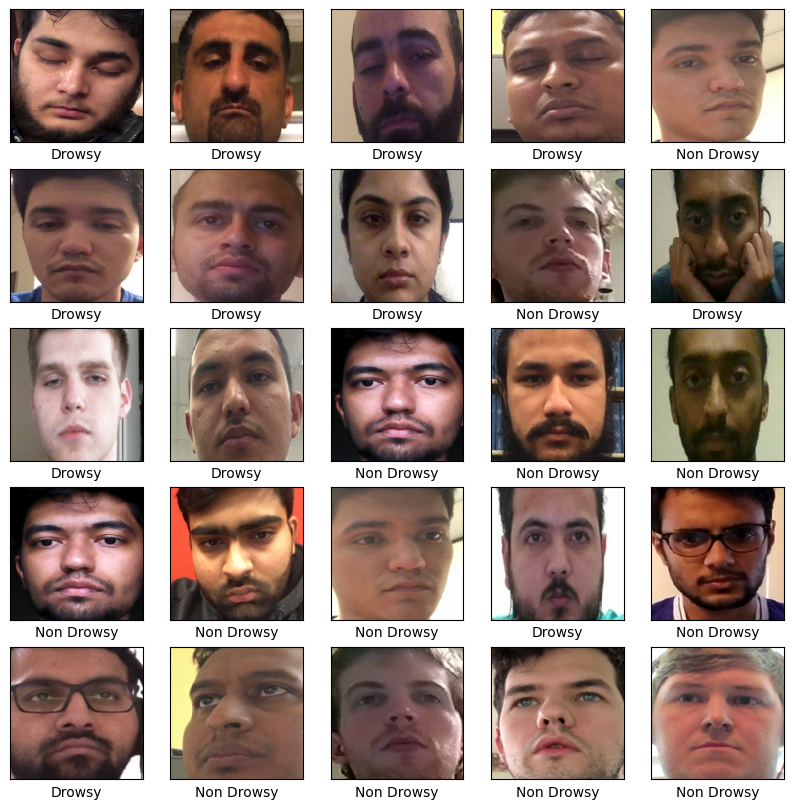

In [ ]:
#plotting the images and their respective labels
plt.figure(figsize=[10,10])
for i in range(25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow((val_images[i]))
  plt.xlabel((class_names[int(val_labels[i][1])]))

plt.show()

In [ ]:
#input shape 
img_width,img_height=224,224
input_shape=(img_width,img_height,3)
batch_size=32

In [ ]:
#vgg16 architecture

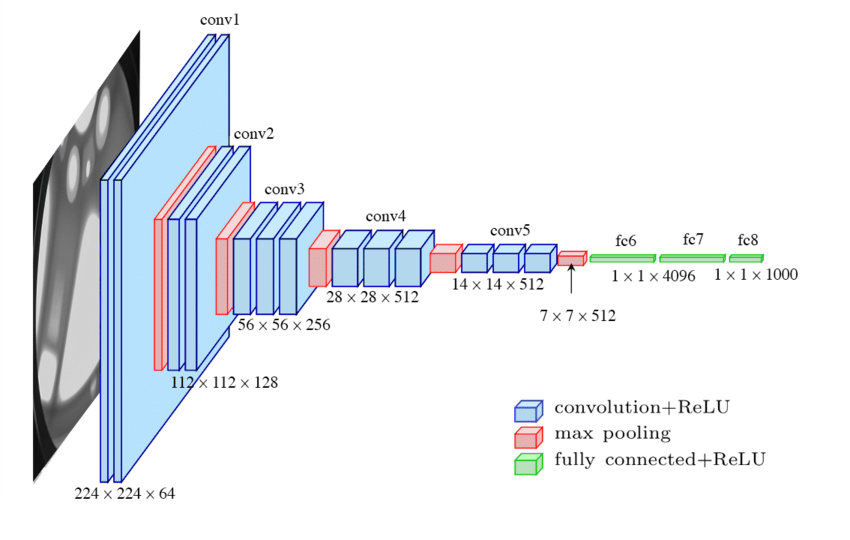

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

# Initialize the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# Add fully connected layers
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


In [ ]:
#compile the model
model.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
# Print the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization_48 (Bat  (None, 224, 224, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_41 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_49 (Bat  (None, 224, 224, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                      

In [ ]:
#Early stopping to reduce Overfitting
earlystop=EarlyStopping(patience=3)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("model_vgg.h5", monitor='val_generator', verbose=1, save_best_only=True)

In [ ]:
model.save('model_vgg.h5')

1.fit is used when the entire training dataset can fit into the memory and no data augmentation is applied.

2.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.

In [ ]:
vgg = model.fit_generator(generator=train_generator,epochs=10,steps_per_epoch=len(train_generator),
                          validation_data= val_generator,validation_steps=len(val_generator),
                          callbacks=[checkpoint,earlystop])

Epoch 1/10
980/980 [==============================] - ETA: 0s - loss: 2.3855 - accuracy: 0.6105

980/980 [==============================] - 723s 728ms/step - loss: 2.3855 - accuracy: 0.6105 - val_loss: 0.4889 - val_accuracy: 0.7521
Epoch 2/10
980/980 [==============================] - ETA: 0s - loss: 0.5883 - accuracy: 0.6609

980/980 [==============================] - 712s 727ms/step - loss: 0.5883 - accuracy: 0.6609 - val_loss: 0.3777 - val_accuracy: 0.8708
Epoch 3/10
980/980 [==============================] - ETA: 0s - loss: 0.5053 - accuracy: 0.7277

980/980 [==============================] - 718s 732ms/step - loss: 0.5053 - accuracy: 0.7277 - val_loss: 0.3699 - val_accuracy: 0.8782
Epoch 4/10
980/980 [==============================] - ETA: 0s - loss: 0.4146 - accuracy: 0.7803

980/980 [==============================] - 711s 725ms/step - loss: 0.4146 - accuracy: 0.7803 - val_loss: 0.1937 - val_accuracy: 0.9131
Epoch 5/10
980/980 [==============================] - ETA: 0s - loss: 0.2852 - accuracy: 0.8560

980/980 [==============================] - 714s 729ms/step - loss: 0.2852 - accuracy: 0.8560 - val_loss: 0.1824 - val_accuracy: 0.9227
Epoch 6/10
980/980 [==============================] - ETA: 0s - loss: 0.2202 - accuracy: 0.9102

980/980 [==============================] - 712s 726ms/step - loss: 0.2202 - accuracy: 0.9102 - val_loss: 0.1008 - val_accuracy: 0.9654
Epoch 7/10
980/980 [==============================] - ETA: 0s - loss: 0.1713 - accuracy: 0.9365

980/980 [==============================] - 712s 726ms/step - loss: 0.1713 - accuracy: 0.9365 - val_loss: 0.1567 - val_accuracy: 0.9362
Epoch 8/10
980/980 [==============================] - ETA: 0s - loss: 0.1292 - accuracy: 0.9549

980/980 [==============================] - 712s 727ms/step - loss: 0.1292 - accuracy: 0.9549 - val_loss: 0.0802 - val_accuracy: 0.9773
Epoch 9/10
980/980 [==============================] - ETA: 0s - loss: 0.1021 - accuracy: 0.9674

980/980 [==============================] - 713s 727ms/step - loss: 0.1021 - accuracy: 0.9674 - val_loss: 0.6382 - val_accuracy: 0.8379
Epoch 10/10
980/980 [==============================] - ETA: 0s - loss: 0.1135 - accuracy: 0.9687

980/980 [==============================] - 713s 727ms/step - loss: 0.1135 - accuracy: 0.9687 - val_loss: 0.0556 - val_accuracy: 0.9861


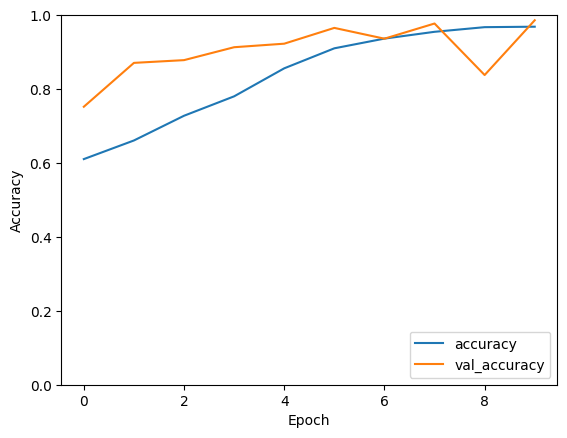

In [ ]:
plt.plot(vgg.history['accuracy'], label='accuracy')
plt.plot(vgg.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right');

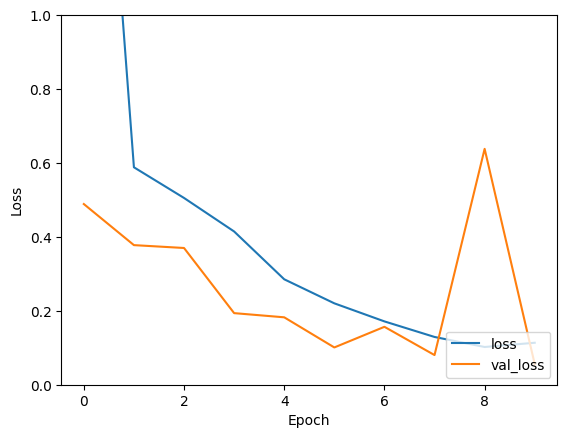

In [ ]:
plt.plot(vgg.history['loss'], label='loss')
plt.plot(vgg.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right');

In [ ]:
test_acc = model.evaluate(test_generator)
print(test_acc)

131/131 [==============================] - 22s 164ms/step - loss: 0.0562 - accuracy: 0.9842
[0.05616053566336632, 0.9842180609703064]


In [ ]:
y_pred=model.predict(test_generator)
y_pred

131/131 [==============================] - 20s 148ms/step


array([[1.0603013e-02, 9.8939693e-01],
       [8.3563632e-01, 1.6436364e-01],
       [9.9999046e-01, 9.5061196e-06],
       ...,
       [7.3033553e-09, 1.0000000e+00],
       [2.4883542e-02, 9.7511643e-01],
       [3.5217635e-09, 1.0000000e+00]], dtype=float32)

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
img=image.load_img('/content/content/to_split_dataset/test/Drowsy/A0071.png',target_size=(224,224))
x=image.img_to_array(img)
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)
a

1/1 [==============================] - 0s 20ms/step


array([0])

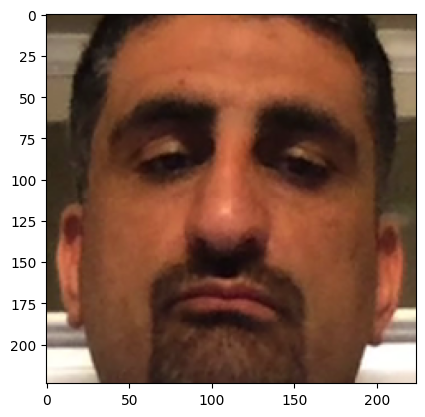

In [ ]:
plt.imshow(img)